In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

import seaborn as sns

from sklearn.decomposition import PCA

%matplotlib inline

## Measurement Data:
* total 40 feature devided into group of 3
* first 16 feature for left(or right) movement. each group A,B,C,D have 4 feature.
* second 16 feature for right(or left) movement
* last 8 feature is combined feature (A,B,C,D | A,B,C,D)
* total 117 observation in each .txt file

## Human Evaluation
* Represents the minimum limit for testing number of pen
* Total 300 pens are taken and the performance of the pen is evaluated by two employee.
* If either of employee identify the pen with bad quality, we don't count it.
* at the end we find 200 pens are with good quality.

In [2]:
def readData_new(fileName):
    data = pd.read_csv(fileName, skiprows= 10, delimiter= ';', decimal=',',usecols=range(98))
    return data

In [3]:
dataB1 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp B_1.TXT')
dataB2 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp B_2.TXT')
dataB3 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp B_3.TXT')
dataB4 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp B_4.TXT')

dataB=pd.concat([dataB1,dataB2,dataB3,dataB4])

dataEF1 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp EF_1.TXT')
dataEF2 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp EF_2.TXT')
dataEF3 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp EF_3.TXT')
dataEF4 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp EF_4.TXT')

dataEF= pd.concat([dataEF1,dataEF2,dataEF3,dataEF4])

dataF1 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp F_1.TXT')
dataF2 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp F_2.TXT')
dataF3 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp F_3.TXT')
dataF4 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp F_4.TXT')

dataF= pd.concat([dataF1,dataF2,dataF3,dataF4])

dataM1 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp M_1.TXT')
dataM2 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp M_2.TXT')
dataM3 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp M_3.TXT')
dataM4 = readData_new('Data_description/TestData/MeasuramentsData/Federtyp M_4.TXT')

dataM= pd.concat([dataM1,dataM2,dataM3,dataM4])

data_final=pd.concat([dataB,dataEF,dataF,dataM],keys=['B','EF','F','M'],ignore_index=True, sort=False)
                      
data_final.tail()


,Datum Uhrzeit,Schreiben 0/0 [V],Schreiben 0/1 [V],Schreiben 0/2 [V],Schreiben 0/3 [V],Schreiben 0/4 [V],Schreiben 0/5 [V],Schreiben 0/6 [V],Schreiben 0/7 [V],Schreiben 0/8 [V],...,Schreiben 5/7 [V],Schreiben 5/8 [V],Schreiben 5/9 [V],Schreiben 5/10 [V],Schreiben 5/11 [V],Schreiben 5/12 [V],Schreiben 5/13 [V],Schreiben 5/14 [V],Schreiben 5/15 [V],Schreiben 6/0 [V]
1643,"05.09.2018 11:22:53,00",47.263234,47.263234,8.794629,8.090293,19.324654,19.324654,4.233085,4.338852,875.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,"05.09.2018 11:23:06,00",55.264633,55.264633,15.628406,1.541478,31.590973,31.590973,8.059764,0.658376,870.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1645,"05.09.2018 11:23:44,00",25.853471,25.853471,2.475847,2.346858,11.519591,11.519591,1.198029,1.180287,879.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,"05.09.2018 11:23:56,00",99.962614,99.962614,6.978670,3.791749,34.240799,34.240799,4.036537,1.681003,904.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1647,"05.09.2018 11:24:30,00",139.103249,139.103249,27.018073,6.889658,59.029780,59.029780,11.444529,4.064404,866.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [4]:
data_final.shape

(1648, 98)

In [5]:
data_final= data_final.rename(columns={"Schreiben 6/0 [V]": "class"})

In [6]:
X=data_final.drop(['class','Datum Uhrzeit'],axis=1)

y=data_final['class']


In [7]:
X=X.iloc[:,0:48]


In [8]:
y[y!=0]=1

/home/deepan/anaconda3/envs/fast/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
from sklearn.model_selection import train_test_split
# Splitting train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

/home/deepan/anaconda3/envs/fast/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [13]:
print("=== Confusion Matrix Random Forest===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("=== Classification Report Random Forest===")
print(classification_report(y_test, rfc_predict))
print('\n')

print("=== All AUC Scores Random Forest===")

print(rfc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix Random Forest===
[[283  34]
 [ 62 165]]


=== Classification Report Random Forest===
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       317
         1.0       0.83      0.73      0.77       227

   micro avg       0.82      0.82      0.82       544
   macro avg       0.82      0.81      0.81       544
weighted avg       0.82      0.82      0.82       544



=== All AUC Scores Random Forest===
[0.84123077 0.93876923 0.78584615 0.66846154 0.89884615 0.97823077
 0.94830769 0.76153846 0.9375     0.75390625]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.851263701923077


In [17]:
rfc.feature_importances_

array([0.02131444, 0.01817001, 0.0187166 , 0.01666437, 0.02412247,
       0.02237545, 0.00942171, 0.01307221, 0.01256842, 0.03573391,
       0.01241604, 0.02101995, 0.0311353 , 0.01987407, 0.02039048,
       0.01818701, 0.11057471, 0.07072167, 0.0197781 , 0.01718921,
       0.01227632, 0.04469382, 0.00624769, 0.00977975, 0.00441785,
       0.01154423, 0.00730045, 0.02045568, 0.01557938, 0.02935851,
       0.01243174, 0.01262121, 0.05000344, 0.05697293, 0.03852658,
       0.04094109, 0.03033664, 0.02253128, 0.01742897, 0.0231063 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

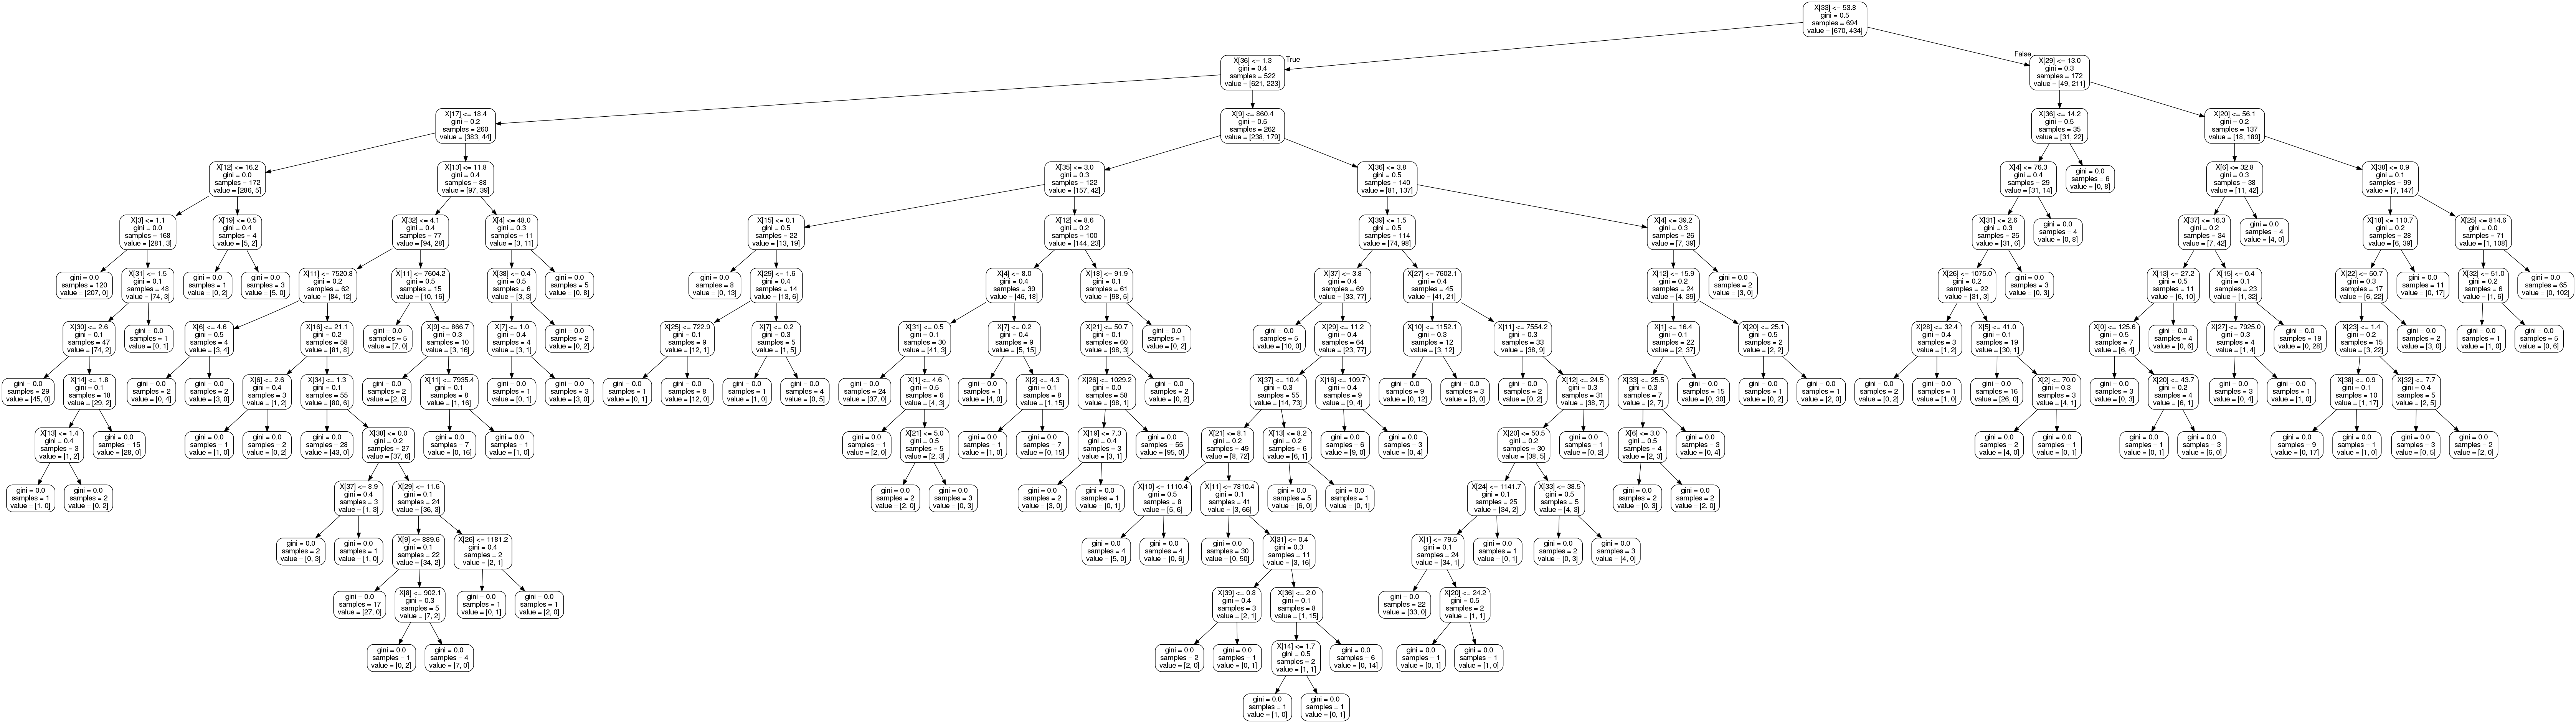

In [32]:
from IPython.display import Image
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(filename='tree.png')